# Text Classification (on Movie Review and  Newsgroup Data) with Naive Bayes Classifier


# 1 Introduction 
Text classification is a major of part of machine learing algorithms. Naive Bayes text classification is a supervised learning approach which uses Bayes' theorem  and  naive assumtions that the words are independent [1] for predicting the class of a given text. For implementing the Naive Bayes approcah for classification task the log-likelihood is used to overcome the underflow. In this project, we use the Naive Bayes classification approach for predicting the sentiment of movie reviews and the class of newsgroups. We have two different data sets one is about movie reviews which contains almost 25000 movie reviews with a label 'positive' or 'negative'. And another dataset is about the 7000 posts submitted to eight online newsgroups on  different topics: cars, religion, sports, and so on. We can directly apply the Naive Bayes approach to movie reviews data set to get the sentiment of the reviewers. But for the second dataset, we first create a dataframe since the data is given as a single text and then do the classification task. 



# 2 Naive Bayes Classification 
Naive Bayes is probabilistic approach uses the Bayes' rule for classification tasks. The main assumptions are that the words in a given text are independent and identically distributed. Let $c_i$'s the class label of texts and for example a text is given $t=w_1w_2...w_i...$ where the words are $w_1, w_2, ..., w_n,...$. The prior probability of each class is $P(c_i)= \frac{Number\,of\, texts\, with \, class\, label\, c_i}{Total \, number \,of \,texts}$. Then the probability of a given text $t$ will be of the class $c_i$ is given by 
$$ p(c_i|t)= \frac{P(c_i)P(t|c_i)}{P(t)}$$
and $P(c_i)P(t|c_i) =  P(c_i)P(w_1w_2...w_j...|c_i) = P(c_i)\prod_j P(w_j|c_i)$, since the words are independent.

By taking $log$ we get, $log (P(c_i)P(t|c_i)) =  logP(c_i) + \sum_j log P(w_j|c_i)$. So,  for any class $c_i$, we have $log (p(c_i|t))\propto  logP(c_i) + \sum_j log P(w_j|c_i)$. And the predicted class will be the one with the maximum value of this quantity. 


# Part I

# 3 Sentiment Classification 
We have a data of movie reviews with the class label either the review is positive or negative. We need to classify a given review is either positive or negative by using Naive Bayes approach. 

**Importing basic libraries**

We import basic libraries for example pandas, numpy, regular expression and so on.

In [1]:
import numpy as np
import pandas as pd 
import re 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 

## 3.1 Reading Data File

Before reading the data file, we need to check the directory. Importantly, we put the data files in the same directory. So let's check which files are in our current folder.

In [6]:
ls

Project 7.ipynb    movie_reviews.zip  newsgroups.zip     stopwords.txt


So, the file containing the movie reviews 'movie_reviews.zip' is in the. current folder. So we can easily read the file.

In [3]:
# Loading the file 
movie_review = pd.read_csv('movie_reviews.zip')
movie_review.head(5)

,review,sentiment
0,"This film is absolutely awful, but nevertheles...",negative
1,Well since seeing part's 1 through 3 I can hon...,negative
2,I got to see this film at a preview and was da...,positive
3,This adaptation positively butchers a classic ...,negative
4,Råzone is an awful movie! It is so simple. It ...,negative


## 3.2 Data Splitting 
We have about 25,000 movie reviews, so for training the model we select a portion of the data and the remaining part will be used as the test set. Initially, we take 50% of the total data as the train set. Later, we check the prediction accuracy with various set of train set. The data splitting task can be done by using sklearn library.

In [4]:
# Train Test data selection 
from sklearn.model_selection import train_test_split

train_df1, test_df1 = train_test_split(movie_review, test_size = 0.5, random_state=100)
train_df1.head(5)

,review,sentiment
21593,I couldn't find anyone to watch DiG! with me b...,positive
20644,This is a good movie. Something fun about watc...,positive
21389,Quite possibly the worst movie I've ever seen;...,negative
10427,"Having seen ""Triumph of the Will,"" I can only ...",negative
6824,This was one of the lamest movies we watched i...,negative


In [518]:
# test_df1.head(5)

## 3.3 Stop Words 
In text classifcation task a set of words used as stop words which commonly used in text but not so informative for the classification task for example 'a', 'and', 'is', 'as', and so on. The list of stop words is not fixed. One can change the list and create own list. Here we are given a list of stop words.

In [7]:
# Reading Stop words 
with open('stopwords.txt') as f:
    stop_words = f.read()
print(f" Given stop words: \n\n {stop_words}")

 Given stop words: 

 a,able,about,across,after,all,almost,also,am,among,an,and,any,are,as,at,be,because,been,but,by,can,cannot,could,dear,did,do,does,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your


We would like to add some words to the given list for example all the alphabet. 

In [8]:
import string
# List of stop words 
stop_words_list = stop_words.split(',')
# Adding the alphabet to the stop words list
stop_words_list = list(set.union(set(stop_words_list), set(list(string.ascii_lowercase))))


## 3.4 Classification Task
For classifying the text into two group, we need the prior probabilities of each group. We have two class for thr movie review data one is positive and another one is negative. So, first of all we calculate the probability of each class in train set.

### 3.4.1 Calculating Prior Probability
The probability of positive sentiment will be $$ P(positive) = \frac{Number \, of \, positive \ sentiment }{Total\, Number\, of\, sentiment}$$
Similarly the probability of negative sentiment:
$$ P(negative) = \frac{Number \, of \, negative \ sentiment }{Total\, Number\, of\, sentiment}$$

In [9]:
# Dataframe containing only positive/negative reviews
positive_train_df1 = train_df1[train_df1['sentiment']=='positive']
negative_train_df1 = train_df1[train_df1['sentiment']=='negative']
# Probability of positive sentiment
prob_pos = positive_train_df1['sentiment'].count()/train_df1['sentiment'].count()
# Probability of negative sentiment
prob_neg = negative_train_df1['sentiment'].count()/train_df1['sentiment'].count()
print(f"Probability of positive sentiment: \n{prob_pos}\n \nProbability of negative sentiment: \n{prob_neg}")


Probability of positive sentiment: 
0.49736
 
Probability of negative sentiment: 
0.50264


### 3.4.2 Word Count in Each Class 
In text classification part, the most important task is to count the number of each words occured in the text. For calculating the words in each class we defin a function which will provide a dataframe of word count for each class. 

In [10]:
def text_to_word_df(text, stop_words):
    """
    This function is defined to get a dataframe of word counts.
    Args:
        text : 
            A text which words will be counted.
        tstop_words:
            A list of words which will be discarded from the count. 

        
    Returns:
         word_count_df:
             A dataframe containing the word count of the given text. 
            
    """
    # Converting all letters in lower case
    text_df_lower = text.lower()
    # Removing characters in between < >
    text_df_filter = re.sub(r"\<.*?\>",'', text_df_lower)
    # Finding all words
    text_word_list = re.findall(r"[a-z]+", text_df_filter)
    # Counting words
    counter = Counter(text_word_list)
    # Creating intermediate dictionary
    word_dic = {'count': counter}
    # Creating dataframe
    word_count_df = pd.DataFrame(word_dic)
    # Dropping the stopwords
    word_count_df = word_count_df.drop(stop_words, errors = 'ignore')
    return word_count_df

Now, we apply this function separately on both postive reviews' text and negative reviews' text.

In [11]:
# Getting all text in positive review 
all_positive_train = positive_train_df1['review'].sum()
# Getting word count dataframe for positive review 
positive_train_words_df = text_to_word_df(text=all_positive_train, stop_words=stop_words_list)

# Getting all text in negative review 
all_negative_train = negative_train_df1['review'].sum()
# Getting word count dataframe for negative review 
negative_train_words_df = text_to_word_df(text=all_negative_train, stop_words=stop_words_list)

We have two separate DataFrames for positive reviews and negative reviews. Now make them one. As in the Naive Bayes approach for text classification task, we use the formula 

$$P(positive|given\_text) \propto P(positive) \prod_i \times P(w_i|positive) $$
where $w_i$'s the words in the given_text. So if the count of any word in the text is 0 then it will cause a probability zero. This will provide a misclassification. To avoid this situation, we add 1 to each word count this is knows as Laplacian smoothing.

In [12]:
# Concatenating dataframes
train_word_count_df = pd.concat([positive_train_words_df, negative_train_words_df], axis=1)
# Filling all NAN by 0
train_word_count_df = train_word_count_df.fillna(0)
# Setting columns name
train_word_count_df.columns = ['positive', 'negative']
# Sorting according to words count value
train_word_count_df = train_word_count_df.sort_values(by=['positive', 'negative'], ascending=False)
# laplacian Smooting 
train_word_count_df = train_word_count_df+1
train_word_count_df.head(5)

,positive,negative
film,10502.0,9800.0
movie,9500.0,12749.0
one,6638.0,6556.0
very,4196.0,2913.0
out,4045.0,4511.0


### 3.4.3 Visualizing Word Frequency 
In each class there are some words which are more dominating and have a larger influence for predicting classification. We now visualize the words by using  WorldCloud which provides wonderful presentation of words.

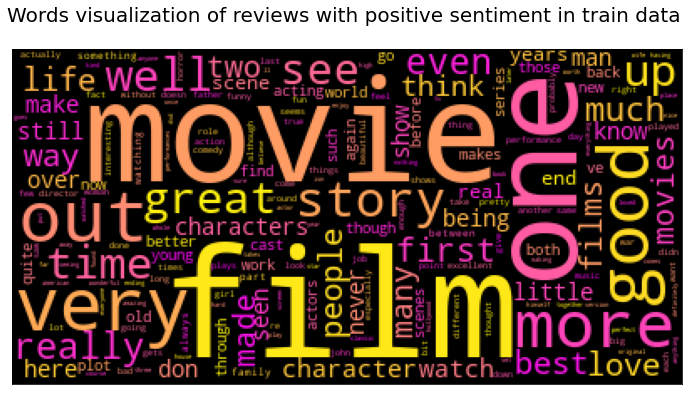

In [13]:
from wordcloud import WordCloud
# Creating word clouds
cloud = WordCloud(max_words = 200, background_color = 'black', colormap = 'spring')
cloud.generate_from_frequencies(train_word_count_df['positive'])
# Plotting the word clouds
plt.figure(figsize=(12, 10))
plt.imshow(cloud)
plt.title('Words visualization of reviews with positive sentiment in train data \n', fontsize =20)
plt.xticks([])
plt.yticks([])
plt.show()

So, in the positive review, we see that the words 'movie', 'film', 'very', 'good', 'out', 'well' are more dominating. Next, we show the words in the negative review.

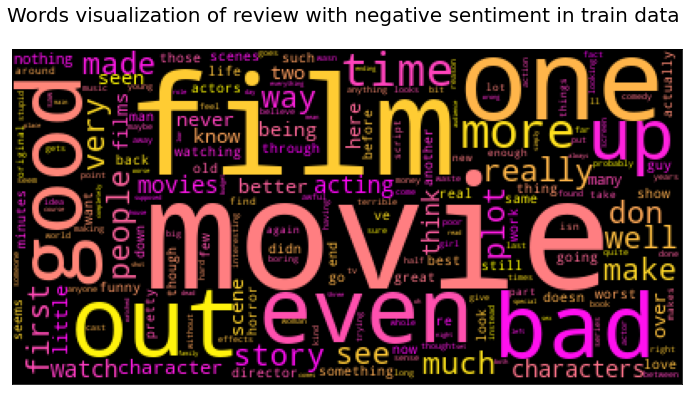

In [14]:
# Making cloud of words in negative review
cloud = WordCloud(max_words = 200, background_color = 'black', colormap = 'spring')
cloud.generate_from_frequencies(train_word_count_df['negative'])
# Showing the word cloud
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.title('Words visualization of review with negative sentiment in train data \n', fontsize =20)
plt.xticks([])
plt.yticks([])
plt.show()

In the negative review, the dominating words are 'movie', 'film', 'one', 'out', 'bad' and so on. 

## 3.5 Predicting Sentiment

Now we classify the test review text by using the Naive Bayes classification formula. We use the log likelihood and the class with max likelihood value will be the predicted class. For classification task we define a function which will take a text and will provide the class. 

In [15]:
def classify_text(sample_text, stop_words=stop_words_list, train_words_df = train_word_count_df):
    """
    This function is defined to get the class of given text.
    Args:
        sample_text : 
            A string which will be classified.
        stop_words : 
            A list of words which will be discarded from the sample text.
        train_words_df : 
            A dataframe containg word count for each class.
        
    Returns:
         pred_class :
             The class label of the sample text.
    
    """
    
    # Getting datafram containing word counts of the sample text
    sample_words_df = text_to_word_df(text=sample_text, stop_words=stop_words)
    # List of matching words of the sample text with the train set
    match_words_list =[w for w in sample_words_df.index if w in train_words_df.index]
    # Number of words which are sample text
    in_favor = train_words_df.loc[match_words_list]      
    # Total words counts in the test set for each class 
    total_words = train_words_df.sum()                   
    # Loglikelihood of the words in the sample text
    probability = np.log2(list(list(zip(*prob_list))[1]))+np.sum(np.log2((in_favor)/total_words)) 
    # Getting the class 
    pred_class = probability.idxmax()
    
    return pred_class
    

Now, we apply this function to each text in the test dataset to get the predicted class for all the reviews. And then we calculate the how much of them are predicted correctly.

In [16]:
prob_list = [('positive', prob_pos), ('negative', prob_neg)]
pred_sentiment = test_df1.apply(lambda x: classify_text(x.review, stop_words=stop_words_list, train_words_df = train_word_count_df), axis=1)


In [17]:
percent_accu = round((sum(test_df1['sentiment']==pred_sentiment)/test_df1['sentiment'].count())*100, 2)
print(f"The percentage accuracy for the sentiment prediction: \n{percent_accu}%")


The percentage accuracy for the sentiment prediction: 
85.59%


So far the predicted score is satisfactory as we got the $85.59\%$ accuracy. Now we make a clear visualization of the classification for each classes by using the confusion matrix. For creating the confusion matrix, we use the pandas crosstab. 

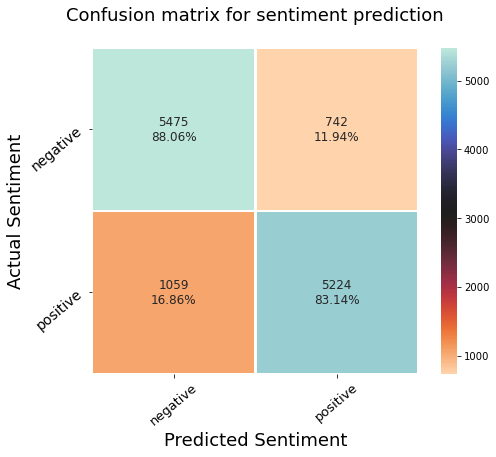

In [18]:
plt.figure(figsize=(8,6))

confusion_matrix = pd.crosstab(test_df1['sentiment'], pred_sentiment, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix = np.array(confusion_matrix)
# Formating the values of each cells in the confusion matrix
value_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
# Percentage of each cell value with respect to each row sum (tottal actual labels)
percentages = ["{0:.2%}".format(per) for per in
                     (confusion_matrix/np.sum(confusion_matrix, axis=1).reshape(2,-1)).flatten()]
# Setting labels
cell_labels = [f"{val}\n{per}" for val, per in
          zip(value_counts, percentages)]
cell_labels = np.asarray(cell_labels).reshape(2,2)
# Plotting the confusion matrix
sns.heatmap(confusion_matrix,
           annot=cell_labels, 
            annot_kws={'fontsize':12},
            fmt='',
           square=True,
           cbar=True,
           cmap='icefire_r',
           linewidth=1.5);
plt.xlabel('Predicted Sentiment', fontsize=18)
plt.ylabel('Actual Sentiment', fontsize=18)
plt.xticks([0.5,1.5], ['negative', 'positive'], rotation=40, fontsize =13)
plt.yticks([0.5,1.5], ['negative', 'positive'], rotation=40, fontsize =13)
plt.yticks(fontsize=14)
plt.title('Confusion matrix for sentiment prediction\n', fontsize=18)
plt.show()

In both cases the prediction is almost similar. But the positive reviews are slightly predicted as negative reviews than that of case of negative reviews. 

## 3.6 Prediction Accuracy vs Train Size 
In the above prediction task we used 50% of the data as the test set. In this subsection, we vary the size of train set and trace how the accuracy of the prediction changes with this varying size of train set. 

In [19]:
# Percetage of data will be used as train set
train_size_percent = np.linspace(35,90,12)/100
# Percent accuracy list
percent_accuracy = []

for train_size in train_size_percent:
    # Splitting daya
    train_df1, test_df1 = train_test_split(movie_review, train_size = train_size, random_state=100)
    
    positive_train_df1 = train_df1[train_df1['sentiment']=='positive']
    negative_train_df1 = train_df1[train_df1['sentiment']=='negative']
    prob_pos = positive_train_df1['sentiment'].count()/train_df1['sentiment'].count()
    prob_neg = negative_train_df1['sentiment'].count()/train_df1['sentiment'].count()
    
    # Getting the word count dataframe for positive reviews
    all_positive_train = positive_train_df1['review'].sum()
    positive_train_words_df = text_to_word_df(text=all_positive_train, stop_words=stop_words_list)
    # Getting the word count dataframe for positive reviews
    all_negative_train = negative_train_df1['review'].sum()
    negative_train_words_df = text_to_word_df(text=all_negative_train, stop_words=stop_words_list)
    
    # Getting the combined word count dataframe
    train_word_count_df = pd.concat([positive_train_words_df, negative_train_words_df], axis=1)
    train_word_count_df = train_word_count_df.fillna(0)
    train_word_count_df.columns = ['positive', 'negative']
    train_word_count_df = train_word_count_df.sort_values(by=['positive', 'negative'], ascending=False)
    train_word_count_df = train_word_count_df+1
    # Getting the predicted class 
    prob_list = [('positive', prob_pos), ('negative', prob_neg)]
    pred_sentiment = test_df1.apply(lambda x: classify_text(x.review, stop_words=stop_words_list, train_words_df = train_word_count_df), axis=1)
    percent_accu = (sum(test_df1['sentiment']==pred_sentiment)/test_df1['sentiment'].count())*100    
    percent_accuracy.append(percent_accu)
    

Now we plot the figure of the results obtained above. 

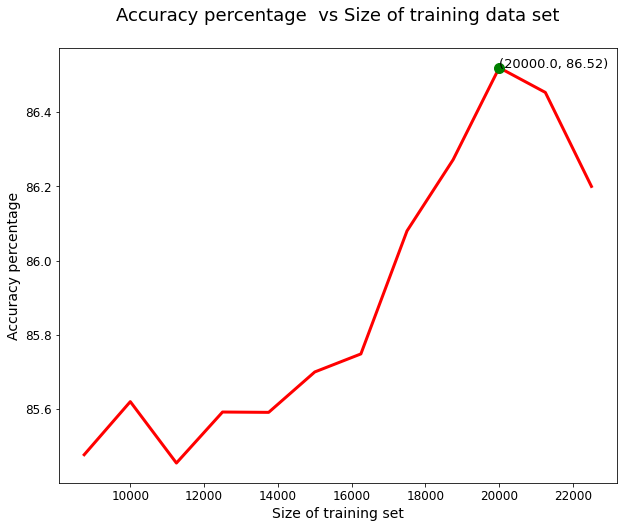

In [20]:
# Getting max accuracy
max_accu=round(max(percent_accuracy), 2)
# Getting the train size for which the maximum accuracy is obtained 
train_for_max=train_size_percent[percent_accuracy.index(max(percent_accuracy))]*len(movie_review)
# plotting the accuracy percentage vs train size 
plt.figure(figsize=(10,8))
plt.plot(train_size_percent*len(movie_review), percent_accuracy, 'r-', linewidth=3)
plt.plot(train_for_max, max_accu,'go', ms=10)
plt.xlabel('Size of training set', fontsize=14)
plt.ylabel('Accuracy percentage', fontsize=14)
plt.title("Accuracy percentage  vs Size of training data set\n", fontsize=18)
plt.text(train_for_max, max_accu,(train_for_max, max_accu), fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The above figure shows that the prediction accuracy increases with the increasing value of train size but the increament is not too much. The maximum accuracy is $86.52\%$ which is obtained when the train size is $20,000$. Later the accuracy decrease slightly,this may because of the small amount of testing data compared to number of reviews used for training the model and random fluctutaions start affecting the overall prediction accuracy.

## 3.7 Classification of Own Reviews
Now we write own reviews on movies and try to get a prediction for each. There are two movie reviews one is positive and another one is negative. The reviews are as follows:

In [21]:
My_review1 = 'This is one of the movies I watched several times. The movie was derected by great novelist, \
screeplay writer professor  Humayun Ahmed. The movie is full of humors but not a full comedy movie.\
It is better to call the movie dramatic-comedy movie. The name of the movie is Noy Number Bipod Sanket.\
If we do translate in enlish it becomes Danger Signal Number Nine. The movie has a good and depth \
realisation of life.The main cast were Rahamat Ali, Chanlenger, Joyonto, Hasan, Tania, and so on. \
The loneliness of an old man was depicted in movie elaborately and precisely. \
Also, every frame of the movie was well organized.'

sentiment1 = 'positive'

My_review2 = "The movie, I recently watched was a thriller based movie. The movie was so boring.\
Though it was a thriller moview, but no suspense and no thrill were found in the whole movie.\
The actors acting skill was also poor. They were not be able to relate with the story line. \
In terms of acting they were  not professional and they did just in their own way.\
I think it is my waste of time to watch this movie. Moreover from the technological  perspective \
it was very novice. The use of VFS was really distictable from the reallity."

sentiment2 = 'negative'

In [22]:
classify_text(sample_text=My_review1, stop_words=stop_words_list, train_words_df = train_word_count_df)

'positive'

In [23]:
classify_text(sample_text=My_review2, stop_words=stop_words_list, train_words_df = train_word_count_df)

'negative'

Wow! The prediction is perfect with the sentiment of writing review in both cases. The first one is a positive review moview and predicted as a positive, the second one is negative and predicted as negative. 

## Part II 
# 4 Newsgroups Classification
The newsgroup dataset has almost 7,000 post on various topics. But the all are in a single text. So, wee need to do some preliminary text analysis to get a workable format of the text. First of all we read the file and visualise a portion of the text to get idea about the format of the posts. 

## 4.1 Data Exploration

In [24]:
# Reading the zip file 
from zipfile import ZipFile
with ZipFile('newsgroups.zip', 'r') as zipped_file:
    news_txt = zipped_file.read('newsgroups.txt').decode(encoding='utf8', errors='ignore')

To have a look at the text of the file, we print a portion of the text. 

In [25]:
# Print 1100 characters 
sam_text = news_txt[:1100]
print(sam_text)

Newsgroup: rec.autos
From: gwm@spl1.spl.loral.com (Gary W. Mahan)
Subject: Re: Are BMW's worth the price?            


>sure sounds like they got a ringer.  the 325is i drove was definitely
>faster than that.  if you want to quote numbers, my AW AutoFile shows
>0-60 in 7.4, 1/4 mile in 15.9.  it quotes Car and Driver's figures
>of 6.9 and 15.3.  oh, BTW, these numbers are for the 325i.

Car and Driver rated the 325is (1988) at 7.2 0-60 , 1/4 at 15.2 (after 30k miles) last time I checked 8#}.

Automobile magazine rated new 325is 1/4 mile@16.2.

Gee , aint quotiin funner than the dickens!

Sounds like we need a race.  I'll let you have the newer version.  Can someone out there lend me a 1988 325is for a day 8-].  I wont hurt it, I promise.

>i don't know how the addition of variable valve timing for 1993 affects it.
>but don't take my word for it.  go drive it.

Actually I will take your word on it.  I refuse to test it (new 325is) because
I love BMW's and would probably want to buy it.

we see that post begins with 'Newsgroup' followed by the name of newsgroup and then who sender of the post and then subject of the post and finally the body. For this classification problem, we need only the newsgroup and the body of the post. So, we extract all newsgroup name and the corresponding body in a DataFrame in a similar format to the movie reviews and then implement the functions we defined earlier. First of all let's create a list where each element containg a complete post: newsgroup, sende, subject, body. 

In [26]:
# Splitting the textfile to create a list
news_txt_list = news_txt.split('Newsgroup: ')
print(f" The number of posts in the text: \n {len(news_txt_list)}")

 The number of posts in the text: 
 7379


There are total 7379 posts have been submitted  to eight online newsgroups with different subjects. Now we create a list of dictionary with newsgroup and the body of the post to create a DataFrame.

In [27]:
# Creating empty list 
h_b_list = []
for idx in range(1, len(news_txt_list)):
    #Creating empty dictionary 
    dic ={}
    # Sellecting all text from each element of news_txt_list by skipping the text 
    # containing information of sender and subject of the post
    head_n_body = re.findall(r"(.*?)\n.*?\n.*?\n(.*)", news_txt_list[idx], re.S)
    # Selecting the newsgroup
    news_group = head_n_body[0][0]
    # Selecting the body 
    body = head_n_body[0][1]
    # Eliminating digits 
    body_r = re.sub(r"[0-9]", '', body)
    # Eliminating  all \n
    body_r2 = re.sub(r"\n", '', body_r)
    # Eliminating email of two formats
    body_r3 = re.sub(r"\@.*?\.edu", '', body_r2)
    body_r4 = re.sub(r"\@.*?\.com", '', body_r3)
    # Creating dictionary 
    dic['newsgroup'] = news_group 
    dic['body'] = body_r4
    # Appending list 
    h_b_list.append(dic)
    

In [28]:
# Creating dataframe 
newsgroup_df = pd.DataFrame(h_b_list)
newsgroup_df.head(5)

,newsgroup,body
0,rec.autos,>sure sounds like they got a ringer. the is i...
1,sci.med,I have been hearing bad thing about amalgam de...
2,alt.atheism,">DATE: Tue, Apr :: GMT>FROM: F. Karner <..."
3,rec.sport.baseball,In article <Apr..> cscimd (Ian M. Derby) write...
4,talk.religion.misc,In article <visser.> visser (Lance Visser) wri...


Now, we have a dataframe with columns 'newsgroup' and 'body'. As before the data will be splitted out into train and test set. Initially, we take 50% of the total data as train and remaining 50% as test set.

In [29]:
# Splitting data into train and test 
train_df2, test_df2 = train_test_split(newsgroup_df, test_size = 0.5, random_state=100)
# Train set 
train_df2.head(5)

,newsgroup,body
4534,rec.autos,In article <.U> <U> writes:>I agree with Gaia....
4879,sci.electronics,"Hello, I'm looking for information on Al..."
4456,rec.sport.hockey,In article <Apr..> jack.petrilli (jack petrill...
3957,rec.sport.hockey,In article <andy.bgsu.edu-> andy.bgsu.edu (Rya...
4778,rec.autos,The European version is called SX and have a ...


For the classification task, we need the prior probability of each class. We have total 8 classes, so let's calculate the probability of each class in train set.

## 4.2 Word Count and Prior Probability 

In [34]:
def prob_and_df(df=newsgroup_df, train_df=train_df2):
    """
    This function is defined to get a list of prior probability of each class
    and the a dataframe.
    Args:
        df : 
            A dataframe which contains the train dataset.
        train_df2 :
            A dataframe of train set. 

        
    Returns:
         prob_list:
             A list of probability of each class.
         train_word_count_df:
             A dataframe containing the word count for each class in the train data. 
            
    """

    # List of all class name 
    newsgroup_list =list(newsgroup_df['newsgroup'].unique())
    # List of probabilities 
    prob_list = []
    # List of datafram containing words count for each class
    group_text_list = []

    for newsgrp in newsgroup_list:
        # Creating a dataframe for each newsgroup
        train_dfi = train_df2[train_df2['newsgroup']==newsgrp]
        # Calculating probability
        prob_i =train_dfi['newsgroup'].count()/train_df2['newsgroup'].count()
        prob_list.append((newsgrp, prob_i))
        # Taking all text for each newsgroup 
        all_text_gi = train_dfi['body'].sum()
        # Creating dataframe for each class 
        all_text_gi_df = text_to_word_df(text=all_text_gi, stop_words=stop_words_list)
        # Appending list 
        group_text_list.append(all_text_gi_df)

    # Concatenating all dataframe 
    train_word_count_df = pd.concat(group_text_list, axis=1)
    # Filling all NAN by 0
    train_word_count_df = train_word_count_df.fillna(0)
    # Setting the column names 
    train_word_count_df.columns = newsgroup_list
    # Sorting rows according to the number of word counts
    train_word_count_df = train_word_count_df.sort_values(by=newsgroup_list, ascending=False)
    # Laplace smoothing by adding 1
    train_word_count_df = train_word_count_df+1
    
    return prob_list, train_word_count_df

In [35]:
prob_list, news_train_word_count_df = prob_and_df(df=newsgroup_df, train_df=train_df2)

In [36]:
print('Newsgroup             Prior Probability')
print('-'* 40)
for p in prob_list:
    print('{:<25s} {:>7.3f}'.format(p[0], p[1]))


Newsgroup             Prior Probability
----------------------------------------
rec.autos                   0.134
sci.med                     0.137
alt.atheism                 0.108
rec.sport.baseball          0.130
talk.religion.misc          0.091
rec.sport.hockey            0.132
sci.electronics             0.134
rec.motorcycles             0.135


The list of datafram news_train_word_count_df contains dataframe of words count for each class. Now we create a dataframe containing words count for each class. 

In [37]:
news_train_word_count_df.head(5)

,rec.autos,sci.med,alt.atheism,rec.sport.baseball,talk.religion.misc,rec.sport.hockey,sci.electronics,rec.motorcycles
car,505.0,3.0,19.0,3.0,7.0,4.0,42.0,50.0
article,297.0,302.0,271.0,269.0,231.0,215.0,186.0,300.0
writes,263.0,231.0,325.0,290.0,245.0,270.0,199.0,297.0
out,232.0,200.0,170.0,204.0,194.0,209.0,182.0,175.0
cars,224.0,1.0,8.0,1.0,1.0,2.0,6.0,9.0


## 4.3 Predicting Newsgroups

The function classify_text will be applied to get the newsgroup classification. One can pass any sample text to get the newsgroup in which the text belongs. But we pass all the test data and then calculate the accuracy of percentage. 

In [38]:
# Predicting the newsgroups on the test set
pred_newsgroup = test_df2.apply(lambda x: classify_text(x.body,
                                                        stop_words=stop_words_list, 
                                                        train_words_df = news_train_word_count_df), axis=1)


In [39]:
percent_accuracy = round((sum(test_df2['newsgroup']==pred_newsgroup)/test_df2['newsgroup'].count())*100,2)
print(f"The percentage accuracy of prediction for the newgroups: \n {percent_accuracy}%")

The percentage accuracy of prediction for the newgroups: 
 88.94%


So the model can predict the classes with a good accuracy which is almost 89%. Again for better understanding lets create the confusion matrix. Here we use the crosstab from pandas libraries and then we show the confusion matrix using the heatmap.

In [40]:
# creating confusion matrix 
confusion_matrix2 = pd.crosstab(test_df2['newsgroup'], 
                                pred_newsgroup, 
                                rownames=['Actual'], 
                                colnames=['Predicted'])


In [43]:
newsgroup_list

NameError: name 'newsgroup_list' is not defined

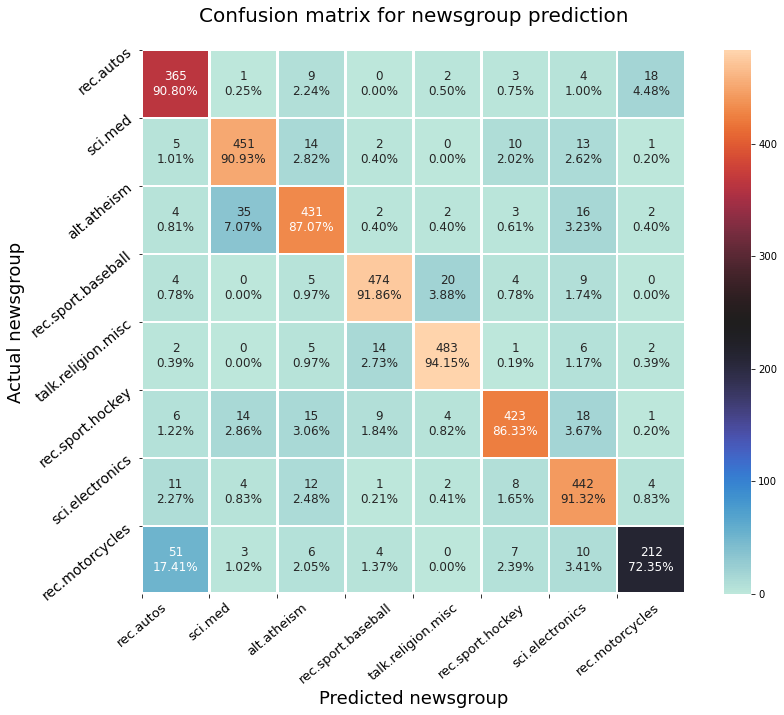

In [44]:
plt.figure(figsize=(14,10))

confusion_matrix = np.array(confusion_matrix2)

# Formating the values of each cells in the confusion matrix
value_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
# Percentage of each cell value with respect to each row sum (tottal actual labels)
percentages = ["{0:.2%}".format(per) for per in
                     (confusion_matrix/np.sum(confusion_matrix, axis=1).reshape(8,-1)).flatten()]
# Setting labels
cell_labels = [f"{val}\n{per}" for val, per in
          zip(value_counts, percentages)]
cell_labels = np.asarray(cell_labels).reshape(8,8)
# Getting the labels of classes
newsgroup_list = newsgroup_df['newsgroup'].unique()
# Plotting the confusion matrix
sns.heatmap(confusion_matrix,
           annot=cell_labels, 
            annot_kws={'fontsize':12},
            fmt='',
           square=True,
           cbar=True,
           cmap='icefire',
           linewidth=1.5);
plt.xlabel('Predicted newsgroup', fontsize=18)
plt.ylabel('Actual newsgroup', fontsize=18)
plt.xticks(range(8), newsgroup_list, rotation=40, fontsize =13)
plt.yticks(range(8), newsgroup_list, rotation=40, fontsize =13)
plt.yticks(fontsize=14)
plt.title('Confusion matrix for newsgroup prediction\n', fontsize=20)
plt.show()

From the above heatmap, it is clear that the model can predict each class with a high accuracy. But in the case of newsgroup 'rec.motorcycles' the accuracy is the lower than any other class. One reason for lower accuracy would be the number of samples. This class has total 293 smaples which is the lowest number among all of the samples.

## 4.4 Train set size vs accuracy 
Now we check how the size of train set contribute the accuracy of the prediction. So, we cosider 15 different training size from 35% to 90% and calculate the percentage accuracy for each case. 

In [45]:
train_size_percent = np.linspace(35,90,15)/100
percent_accuracy_list = []

for train_size in train_size_percent:
    train_df2, test_df2 = train_test_split(newsgroup_df, train_size = train_size, random_state=100)
    
    prob_list, news_train_word_count_df = prob_and_df(df=newsgroup_df, train_df=train_df2)
    pred_newsgroup = test_df2.apply(lambda x: classify_text(x.body,
                                                        stop_words=stop_words_list, 
                                                        train_words_df = news_train_word_count_df), axis=1)

    percent_accuracy = round((sum(test_df2['newsgroup']==pred_newsgroup)/test_df2['newsgroup'].count())*100,2)   
    
    percent_accuracy_list.append(percent_accuracy)
    

**Plot accuracy percentage  vs Size of training set**

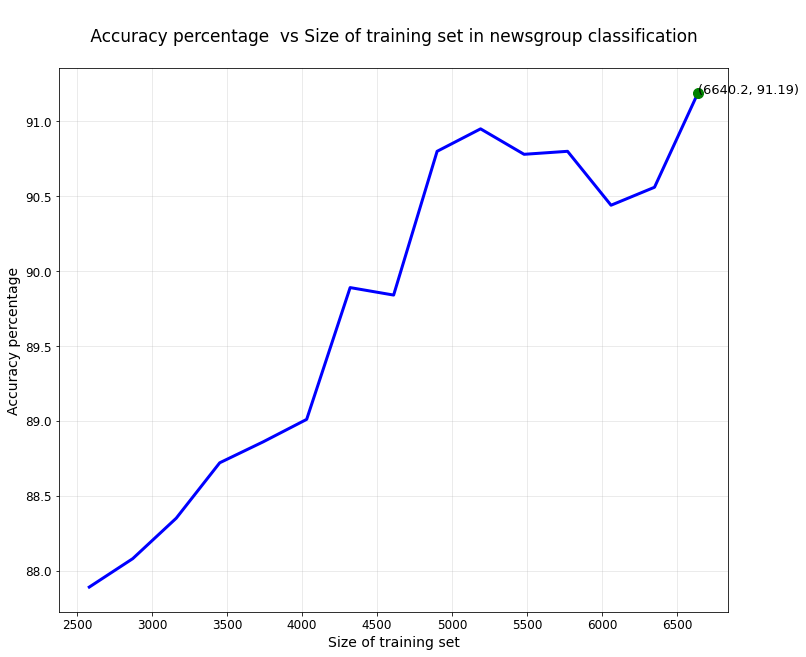

In [46]:
# max accuracy
max_accu=round(max(percent_accuracy_list), 2)
# training size for max accuracy obtained
train_for_max=train_size_percent[percent_accuracy_list.index(max(percent_accuracy_list))]*len(newsgroup_df)
# Ploting the figure
plt.figure(figsize=(12,10))
plt.plot(train_size_percent*len(newsgroup_df), percent_accuracy_list, 'b-', linewidth=3)
plt.plot(train_for_max, max_accu,'go', ms=10)
plt.xlabel('Size of training set', fontsize=14)
plt.ylabel('Accuracy percentage', fontsize=14)
plt.title("\n Accuracy percentage  vs Size of training set in newsgroup classification \n", fontsize=17)
plt.text(train_for_max, max_accu,(train_for_max, max_accu), fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The above figure shows that the larger train set provides the better accuracy, though the relation is not linear. Initially it increases and then somewhere it decreases and then again increases get a maximum accuracy for the train size about 6640 samples and the maximum accuracy is 91.19%.

# 5 Conclusion
In this project, Naive Bayes  probabilistic approach is used to classify text of two different datasets. One data set was about movie reviews with only two classes 'positive' and 'negative'. The model predicted the unseen test data set with accuracy almost 86%. We also showed that the accuracy slightly increases with the increasing size of the train set. Moreover, we write two reviews and apply the model to classify our reviews, the model predicted with perfect label of the reviews. The second data set was about the newsgroups' post. There were more than 7,000 posts submitted to  different eight online newsgroups with differnt topics. We applied the same approach to classify the newsgroup and the percentage of the prediction accuracy was almost 89%. In this case also the percentage accuracy inceases with the increasing size of train data. All the classification results were visualised in heatmap for better explanation.

# Reference 
[1]  Wikipedia: [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

[2] Leture Notes: [https://www.mth548.org](https://www.mth548.org)

[3] NLP: [Stanford University](https://nlp.stanford.edu/IR-book/html/htmledition/text-classification-and-naive-bayes-1.html)